# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the number of columns the notebook can display
pd.set_option('display.max_columns', 200)

# Load the data

In [2]:
df = pd.read_csv(r"C:\Users\akpla\Downloads\archive (6)\housing.csv")

In [3]:
df.head(5)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


# Data Understanding

In [4]:
df.shape

(384977, 22)

In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [6]:
df.region.value_counts()

jacksonville      4246
columbus          3738
rochester         3677
jackson           3667
fayetteville      3652
                  ... 
southwest MS        12
st louis             9
southwest TX         9
fort smith, AR       5
kansas city          3
Name: region, Length: 404, dtype: int64

In [7]:
df.state.value_counts().head(5)

ca    33085
fl    31929
tx    31137
nc    18628
mi    14529
Name: state, dtype: int64

In [8]:
df.type.unique()

array(['apartment', 'condo', 'house', 'duplex', 'townhouse', 'loft',
       'manufactured', 'cottage/cabin', 'flat', 'in-law', 'land',
       'assisted living'], dtype=object)

In [9]:
# Drop features 
df1=df.drop(['id', 'url',
    #'region', 
    'region_url', 
    #'price', 'type', 'sqfeet', 'beds',
    #   'baths', 'cats_allowed', 'dogs_allowed',
    'smoking_allowed',
       'wheelchair_access',
    'electric_vehicle_charge', 
    #'comes_furnished',
       'laundry_options', 
    #'parking_options',
    'image_url', 'description', 'lat',
       'long',
             #'state'
], axis = 'columns').copy()

In [10]:
df1[10000:10005]

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,comes_furnished,parking_options,state
10000,stockton,1675,apartment,1240,2,2.0,1,1,0,carport,ca
10001,stockton,1495,apartment,932,1,1.0,1,1,0,carport,ca
10002,stockton,1800,apartment,761,1,1.0,1,1,0,NaN,ca
10003,stockton,1685,apartment,1045,2,2.0,1,1,0,carport,ca
10004,stockton,2075,apartment,1166,2,2.0,1,1,0,carport,ca


In [11]:
df1.parking_options.unique()

array(['carport', 'attached garage', nan, 'off-street parking',
       'detached garage', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

# Data Cleaning

In [12]:
df1.dtypes

region              object
price                int64
type                object
sqfeet               int64
beds                 int64
baths              float64
cats_allowed         int64
dogs_allowed         int64
comes_furnished      int64
parking_options     object
state               object
dtype: object

In [13]:
df2 = df1[['region', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'comes_furnished', 'parking_options', 'state', 'price']].copy()

In [14]:
# Check for NA values
df2.isna().sum()

region                  0
type                    0
sqfeet                  0
beds                    0
baths                   0
cats_allowed            0
dogs_allowed            0
comes_furnished         0
parking_options    140687
state                   0
price                   0
dtype: int64

In [15]:
df2['parking_options']=df2.parking_options.fillna('no parking')
df2.isna().sum()

region             0
type               0
sqfeet             0
beds               0
baths              0
cats_allowed       0
dogs_allowed       0
comes_furnished    0
parking_options    0
state              0
price              0
dtype: int64

# Features Engineering

In [16]:
# create a new column pets_allowed in a pandas DataFrame that takes the value 1 if both dogs_allowed and cats_allowed are 1
df2['pets_allowed'] = (df2['cats_allowed'] & df2['dogs_allowed']).astype(int)
df3 = df2.drop(['cats_allowed', 'dogs_allowed'], axis = 'columns')

In [17]:
df3.head(10)

,region,type,sqfeet,beds,baths,comes_furnished,parking_options,state,price,pets_allowed
0,reno / tahoe,apartment,1078,3,2.0,0,carport,ca,1148,1
1,reno / tahoe,condo,1001,2,2.0,0,carport,ca,1200,0
2,reno / tahoe,apartment,1683,2,2.0,0,attached garage,ca,1813,1
3,reno / tahoe,apartment,708,1,1.0,0,carport,ca,1095,1
4,reno / tahoe,apartment,250,0,1.0,1,no parking,ca,289,1
5,reno / tahoe,apartment,720,1,1.0,0,no parking,ca,1093,1
6,reno / tahoe,apartment,661,1,1.0,0,off-street parking,ca,935,1
7,reno / tahoe,apartment,708,1,1.0,0,carport,ca,1095,1
8,reno / tahoe,apartment,1053,2,2.0,0,carport,ca,1525,1
9,reno / tahoe,condo,930,2,2.0,0,carport,ca,1295,0


In [18]:
df3.parking_options.unique()

array(['carport', 'attached garage', 'no parking', 'off-street parking',
       'detached garage', 'street parking', 'valet parking'], dtype=object)

In [19]:
is_a_parking = ['carport', 'attached garage', 'off-street parking', 'detached garage', 'valet parking']
df3.parking_options=df3.parking_options.apply(lambda x: 1 if x in is_a_parking else 0)

In [20]:
df3.head(10)

,region,type,sqfeet,beds,baths,comes_furnished,parking_options,state,price,pets_allowed
0,reno / tahoe,apartment,1078,3,2.0,0,1,ca,1148,1
1,reno / tahoe,condo,1001,2,2.0,0,1,ca,1200,0
2,reno / tahoe,apartment,1683,2,2.0,0,1,ca,1813,1
3,reno / tahoe,apartment,708,1,1.0,0,1,ca,1095,1
4,reno / tahoe,apartment,250,0,1.0,1,0,ca,289,1
5,reno / tahoe,apartment,720,1,1.0,0,0,ca,1093,1
6,reno / tahoe,apartment,661,1,1.0,0,1,ca,935,1
7,reno / tahoe,apartment,708,1,1.0,0,1,ca,1095,1
8,reno / tahoe,apartment,1053,2,2.0,0,1,ca,1525,1
9,reno / tahoe,condo,930,2,2.0,0,1,ca,1295,0


In [21]:
df3.region.nunique()

404

In [22]:
# cleaning the region variable
'''
name after foward slash
2 capital letters after space
'''
def region_foward_slash(x):
    tokens = x.split('/')
    return tokens[0].strip()
df3.region = df3.region.apply(lambda x: region_foward_slash(x))

In [23]:
def strip_last_two_uppercase_chars(string):
    if string[-2:].isupper():
        return string[:-2].strip()
    return(string)
df3.region = df3.region.apply(lambda x: strip_last_two_uppercase_chars(x))

In [24]:
df3.region= df3.region.apply(lambda x: 'west virginia' if x=='west virginia (old)' else x)
df3.query('region=="west virginia (old)"')

,region,type,sqfeet,beds,baths,comes_furnished,parking_options,state,price,pets_allowed


In [25]:
df3.region.unique()[:10]

array(['reno', 'sacramento', 'boulder', 'visalia-tulare', 'santa barbara',
       'SF bay area', 'siskiyou county', 'ventura county', 'san diego',
       'san luis obispo'], dtype=object)

In [26]:
df.state.unique()

array(['ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'mi', 'md', 'ma', 'mn', 'ms', 'nc',
       'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'oh', 'nd', 'ok',
       'or', 'pa', 'ri', 'sc', 'tn', 'sd', 'tx', 'ut', 'va', 'vt', 'wa',
       'wv', 'wi', 'wy', 'al', 'az', 'ak', 'ar'], dtype=object)

# Dimensionality reduction

In [27]:
df3.head(10)

,region,type,sqfeet,beds,baths,comes_furnished,parking_options,state,price,pets_allowed
0,reno,apartment,1078,3,2.0,0,1,ca,1148,1
1,reno,condo,1001,2,2.0,0,1,ca,1200,0
2,reno,apartment,1683,2,2.0,0,1,ca,1813,1
3,reno,apartment,708,1,1.0,0,1,ca,1095,1
4,reno,apartment,250,0,1.0,1,0,ca,289,1
5,reno,apartment,720,1,1.0,0,0,ca,1093,1
6,reno,apartment,661,1,1.0,0,1,ca,935,1
7,reno,apartment,708,1,1.0,0,1,ca,1095,1
8,reno,apartment,1053,2,2.0,0,1,ca,1525,1
9,reno,condo,930,2,2.0,0,1,ca,1295,0


In [28]:
df3.type.value_counts()

apartment          318032
house               33266
townhouse           15885
condo                6238
duplex               5047
manufactured         4242
cottage/cabin         861
loft                  693
flat                  531
in-law                172
land                    8
assisted living         2
Name: type, dtype: int64

In [29]:
type_list = df3.type.value_counts()[df3.type.value_counts() < 15885 ]

In [30]:
df3.type=df3.type.apply(lambda x:'other' if x in type_list else x)

In [31]:
df3.type.value_counts()

apartment    318032
house         33266
other         17794
townhouse     15885
Name: type, dtype: int64

# Feature Understanding

In [32]:
df3.describe()

,sqfeet,beds,baths,comes_furnished,parking_options,price,pets_allowed
count,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,3.849770e+05,384977.000000
mean,1.059900e+03,1.905345,1.480718,0.048128,0.584843,8.825722e+03,0.694348
std,1.915076e+04,3.494572,0.618061,0.214036,0.492750,4.462200e+06,0.460684
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,7.500000e+02,1.000000,1.000000,0.000000,0.000000,8.050000e+02,0.000000
50%,9.490000e+02,2.000000,1.000000,0.000000,1.000000,1.036000e+03,1.000000
75%,1.150000e+03,2.000000,2.000000,0.000000,1.000000,1.395000e+03,1.000000
max,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,2.768307e+09,1.000000


[]

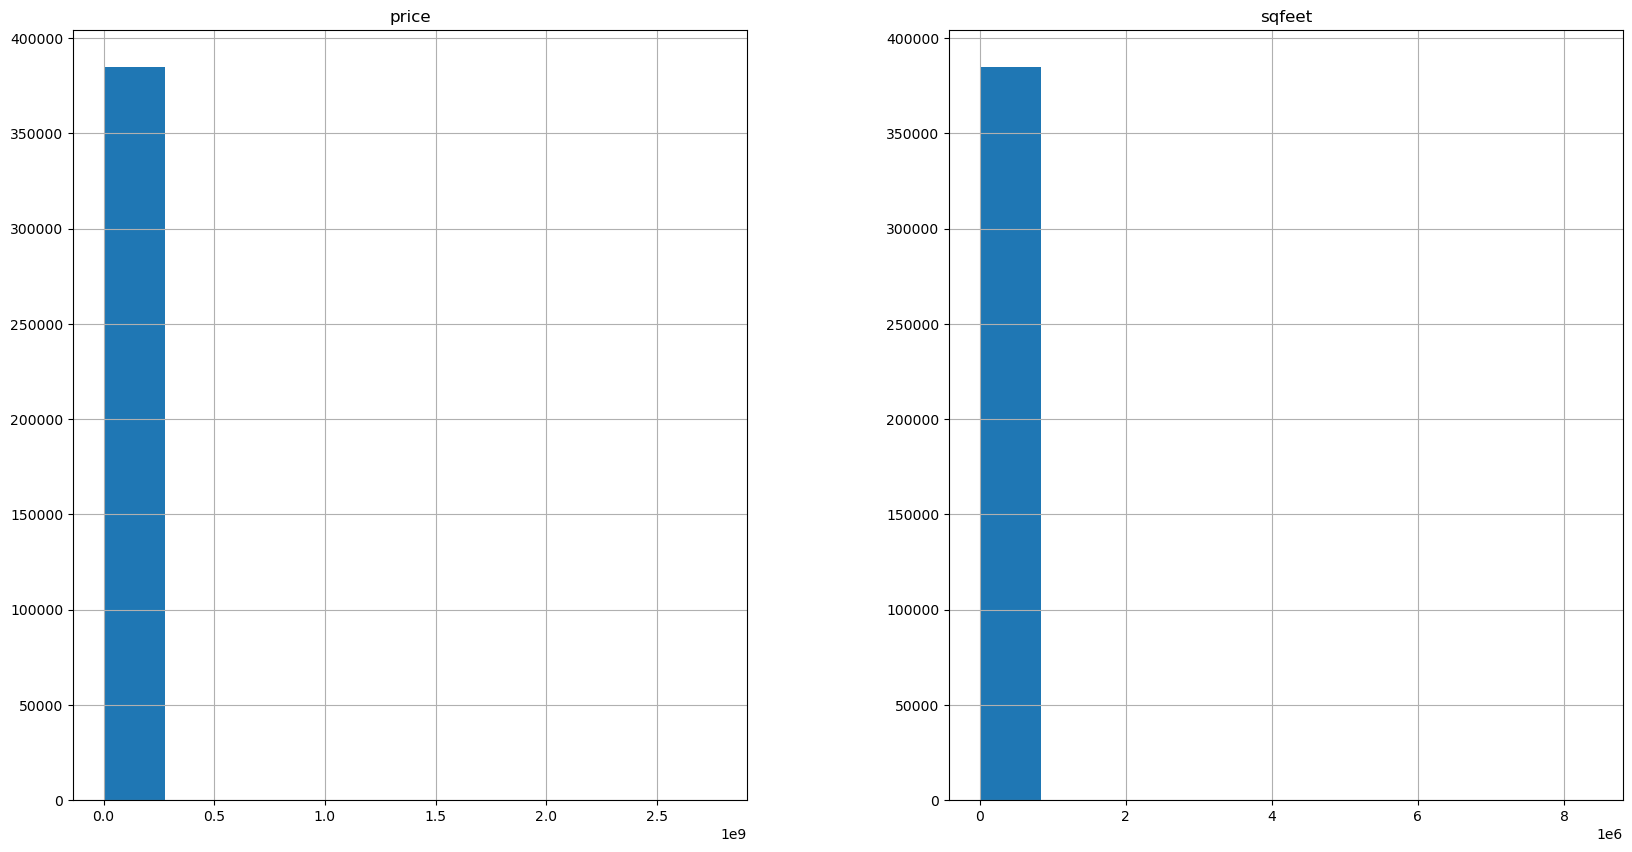

In [33]:
# Plot the numerical variables
%matplotlib inline
df3[['price','sqfeet']].hist(figsize=(20,10))
plt.plot()

This chart shows that the price and the square footage of some rentals home are 0.
According to zonning, The minimum square footage for a house is 120 square feet, 
and at least one room must be habitable so we'll need to remove those outliers in the data.

In [34]:
df3.beds.value_counts()

2       175513
1       117226
3        67037
4        11575
0        10978
5         2324
6          240
7           49
8           31
1000         2
1100         2
Name: beds, dtype: int64

In [35]:
df.baths.value_counts()

1.0     198184
2.0     134649
1.5      27363
2.5      13162
3.0       5549
0.0       3107
4.0       1495
3.5       1007
4.5        231
5.0        131
5.5         57
6.0         26
7.0          4
6.5          4
75.0         2
7.5          2
8.5          1
35.0         1
8.0          1
25.0         1
Name: baths, dtype: int64

Most home have at most 3 bedrooms and 3 bathrooms so we can remove the rentals that have more than 4 bedrooms and 4 baths
A 4 bedroom average size is around 2000 square feet for small home and 5000 square feet for big home so we can remove rental 
properties that have more than 5000 square feet.

# Outliers removal

In [36]:
# Square feet outliers removal
df3.query('sqfeet<120 or sqfeet>5000')

,region,type,sqfeet,beds,baths,comes_furnished,parking_options,state,price,pets_allowed
546,reno,apartment,70,1,1.0,0,0,ca,817,1
625,reno,house,17951,3,2.0,0,1,ca,1995,0
929,reno,house,5081,3,2.5,0,1,ca,1950,0
2134,sacramento,apartment,13,3,2.0,0,1,ca,2025,0
3481,sacramento,house,5282,6,5.0,0,0,ca,5500,0
...,...,...,...,...,...,...,...,...,...,...
382061,orange county,house,75,1,1.0,0,0,ca,900,0
382276,orange county,house,5452,4,4.0,0,0,ca,6025,1
383234,palm springs,house,5251,4,4.0,0,0,ca,6010,0
383424,palm springs,apartment,105,2,2.0,0,1,ca,1480,1


In [37]:
df4 = df3.query('sqfeet>=120 and sqfeet<=5000')
df4.shape

(383668, 10)

In [38]:
# remove home with more than 4 bedrooms and 4 bathrooms
df4.query('beds>4 or baths>4')

,region,type,sqfeet,beds,baths,comes_furnished,parking_options,state,price,pets_allowed
107,reno,apartment,1939,5,2.5,0,0,ca,1125,0
930,reno,house,3300,5,3.0,0,1,ca,2495,0
1266,reno,house,3744,4,4.5,0,1,ca,3900,1
1337,sacramento,apartment,916,2,5.0,0,1,ca,1475,1
1407,sacramento,house,2900,7,3.0,0,1,ca,2900,0
...,...,...,...,...,...,...,...,...,...,...
383769,palm springs,house,2300,5,2.0,0,1,ca,2195,1
383916,palm springs,house,2426,5,3.0,0,0,ca,3210,1
383919,palm springs,house,3464,4,4.5,0,1,ca,4250,0
384058,redding,house,5000,5,3.0,0,1,ca,3500,1


In [39]:
df5 = df4.query('beds<=4 and baths<=4')
df5.shape

(380886, 10)

In [40]:
df5.query('beds == 0 and baths ==0')

,region,type,sqfeet,beds,baths,comes_furnished,parking_options,state,price,pets_allowed


In [41]:
# remove the price outliers by region using one standard deviation
def remove_price_outliers(df5):
    df_out = pd.DataFrame()
    for key, subdf in df5.groupby('region'):
        m = np.mean(subdf.price)
        st = np.std(subdf.price)
        reduced_df = subdf[(subdf.price>(m-st)) & (subdf.price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df6=remove_price_outliers(df5)
df6.shape

(321887, 10)

In [42]:
df6.price.describe()

count    321887.000000
mean       1143.826880
std         561.185268
min           0.000000
25%         820.000000
50%        1020.000000
75%        1340.000000
max       78900.000000
Name: price, dtype: float64

In [43]:
q_high,q_low = df6.price.quantile(0.999),df6.price.quantile(0.001)
q_high,q_low 

(4395.0, 150.0)

- 99.8% of the price of rentals properties in the data falls between 150 and 4395. 
- We can remove the prices that areless than 100 and more than 5000

In [44]:
df7 = df6.query('price>100 and price<5000').copy()

[]

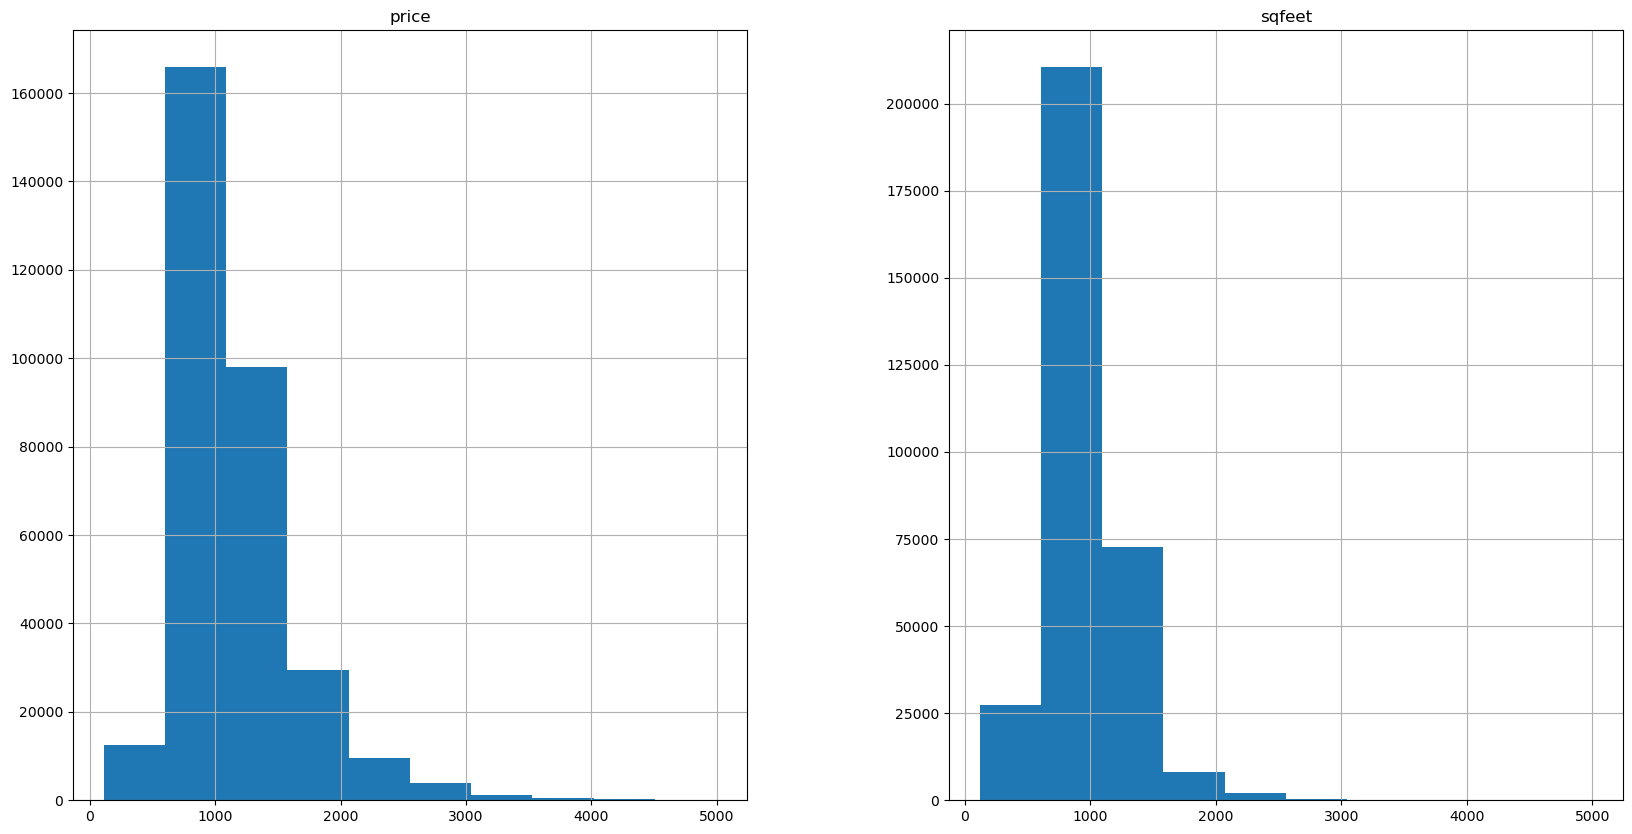

In [45]:
%matplotlib inline
df7[['price','sqfeet']].hist(figsize=(20,10))
plt.plot()

- The price and sqfeet data are normally distributed.
- Most rentals houses prices are between 500 and 2000

# Features Relationship

In [46]:
df7.parking_options = df7.parking_options.astype(int)
df7.parking_options.dtypes
df7.head()

,region,type,sqfeet,beds,baths,comes_furnished,parking_options,state,price,pets_allowed
0,SF bay area,apartment,325,1,1.0,0,1,ca,1650,0
1,SF bay area,other,500,1,1.0,0,0,ca,1495,0
2,SF bay area,house,1258,3,2.0,0,1,ca,2900,1
3,SF bay area,apartment,850,2,1.0,0,1,ca,3400,0
4,SF bay area,other,500,2,1.0,0,0,ca,1895,0


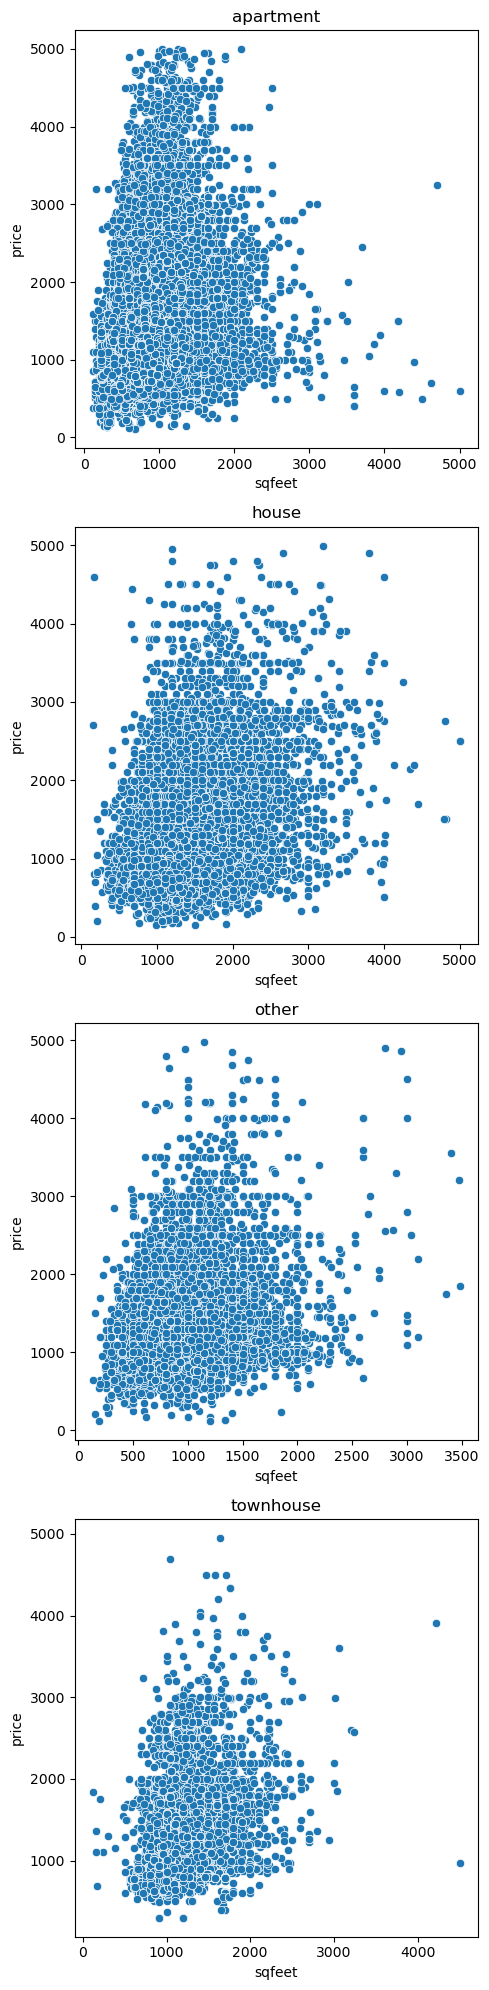

In [47]:
# create a new figure to hold the subplots
fig, axes = plt.subplots(nrows=len(df7['type'].unique()), figsize=(5,20))

# loop through each unique state and create a scatterplot on its own subplot
for i, (key, subdf) in enumerate(df7.groupby('type')):
    sns.scatterplot(x=subdf.sqfeet, y=subdf.price, ax=axes[i])
    axes[i].set_title(key)  # set the title to the name of the state
    
# display the plots
plt.tight_layout()
plt.show()

# Data Correlation

<AxesSubplot:>

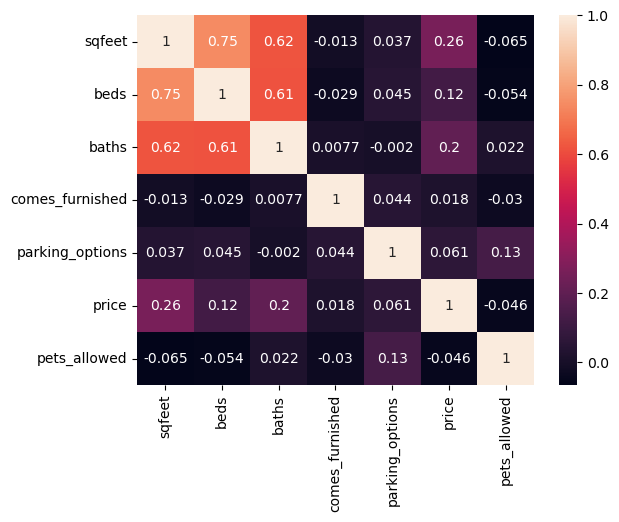

In [48]:
correlation = df7.corr()
sns.heatmap(correlation, annot=True)

Bedrooms are Sqfeet are highly correlated, Baths and Bedrooms are also positively correlated

# Label Encoding with OneHotEncoding

In [49]:
df7.head()

,region,type,sqfeet,beds,baths,comes_furnished,parking_options,state,price,pets_allowed
0,SF bay area,apartment,325,1,1.0,0,1,ca,1650,0
1,SF bay area,other,500,1,1.0,0,0,ca,1495,0
2,SF bay area,house,1258,3,2.0,0,1,ca,2900,1
3,SF bay area,apartment,850,2,1.0,0,1,ca,3400,0
4,SF bay area,other,500,2,1.0,0,0,ca,1895,0


In [50]:
dummies1 = pd.get_dummies(df7.region)
dummies2 = pd.get_dummies(df7.type)
dummies3 = pd.get_dummies(df7.state)
df8 = pd.concat([df7,dummies1,dummies2,dummies3], axis = 'columns').drop(['region','type','state'], axis = 'columns')

In [51]:
df8.head()

,sqfeet,beds,baths,comes_furnished,parking_options,price,pets_allowed,SF bay area,abilene,akron,albany,albuquerque,altoona-johnstown,amarillo,ames,anchorage,ann arbor,annapolis,appleton-oshkosh-F,asheville,ashtabula,athens,atlanta,auburn,augusta,austin,bakersfield,baltimore,baton rouge,battle creek,beaumont,bellingham,bemidji,bend,billings,binghamton,birmingham,bismarck,bloomington,bloomington-normal,boise,boone,boston,boulder,bowling green,bozeman,brainerd,brownsville,brunswick,buffalo,butte,cape cod,catskills,cedar rapids,central,central louisiana,central michigan,champaign urbana,charleston,charlotte,charlottesville,chattanooga,chautauqua,chicago,chico,chillicothe,cincinnati,clarksville,cleveland,clovis,college station,colorado springs,columbia,columbus,cookeville,corpus christi,corvallis,cumberland valley,dallas,danville,dayton,daytona beach,decatur,deep east texas,del rio,delaware,denver,des moines,detroit metro,dothan,dubuque,duluth,east idaho,east oregon,eastern,eastern kentucky,eastern montana,eastern panhandle,eastern shore,eau claire,...,texoma,the thumb,toledo,topeka,treasure coast,tri-cities,tucson,tulsa,tuscaloosa,tuscarawas co,twin falls,twin tiers,tyler,upper peninsula,utica-rome-oneida,valdosta,ventura county,vermont,victoria,visalia-tulare,waco,"washington,",waterloo,watertown,wausau,wenatchee,west virginia,western,western maryland,western massachusetts,western slope,wichita,wichita falls,williamsport,wilmington,winchester,winston-salem,worcester,wyoming,yakima,york,youngstown,yuba-sutter,yuma,zanesville,apartment,house,other,townhouse,ak,al,ar,az,ca,co,ct,dc,de,fl,ga,hi,ia,id,il,in,ks,ky,la,ma,md,me,mi,mn,mo,ms,mt,nc,nd,ne,nh,nj,nm,nv,ny,oh,ok,or,pa,ri,sc,sd,tn,tx,ut,va,vt,wa,wi,wv,wy
0,325,1,1.0,0,1,1650,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,500,1,1.0,0,0,1495,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1258,3,2.0,0,1,2900,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,850,2,1.0,0,1,3400,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,500,2,1.0,0,0,1895,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
df8.shape

(321452, 452)

# Build model 

In [53]:
# Splitting the data into features X and target variable Y
X = df8.drop('price', axis = 'columns')
y = df8.price
# Scale the features X so that no single feature dominates the learning algorithm
from sklearn.preprocessing import StandardScaler
X_scaled =StandardScaler().fit_transform(X)

In [54]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2)

In [55]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
lr.score(X_test,y_test)

0.7504587164043495

In [61]:
# Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
d_regressor= DecisionTreeRegressor().fit(X_train, y_train)
d_regressor.score(X_test, y_test)

0.8301542685570894

# Use K-Fold to cross validate our linear model

In [56]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
score = cross_val_score(LinearRegression(), X,y,cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0))

In [57]:
score.mean()

0.7489911640385374

# Find the optimal model using GridSearchCV

This took a long time

In [58]:
# import warnings filter
'''from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2]
                
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'RandomForestRegressor':{
            'model': RandomForestRegressor(),
            'params':{
                'bootstrap':['True','False']
            }
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(X,y)'''

"from warnings import simplefilter\n# ignore all future warnings\nsimplefilter(action='ignore', category=FutureWarning)\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import Lasso\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.ensemble import RandomForestRegressor\ndef find_best_model_using_gridsearchcv(X,y):\n    algos = {\n        'linear_regression' : {\n            'model': LinearRegression(),\n            'params': {\n                'normalize': [True, False]\n            }\n        },\n        'lasso': {\n            'model': Lasso(),\n            'params': {\n                'alpha': [1,2]\n                \n            }\n        },\n        'decision_tree': {\n            'model': DecisionTreeRegressor(),\n            'params': {\n                'criterion' : ['mse','friedman_mse'],\n                'splitter': ['best','random']\n            }\n        },\n        'RandomForestRegressor':{\n            'model': RandomForestRegress